In [3]:
# Creación de la base de datos 

import dataset
import importlib
importlib.reload(dataset)
from dataset import DatasetCreation

In [4]:
from torch_geometric.utils import to_undirected,add_self_loops
from torch_geometric.data import Data
import itertools
import torch
import numpy as np 

In [91]:
# Creacion de la base de datos para probar los algoritmos clásicos del TSP 
TSPs = []

num_datasets = 1

for num_nodes in range(5, 20):
  node_coords, distance_matrices,solution_paths, solution_adjacencies, distances = DatasetCreation.create_dataset(num_nodes = num_nodes,  num_datasets = num_datasets)

  # Peso para el entrenamiento de la red neuronal, mayor número de nodos mayor peso tiene en el entrenamiento. 
  num_pos = num_nodes
  num_neg = num_nodes**2-num_nodes

  weight_pos_class = (num_neg/num_pos)

  edge_index = torch.tensor(list(itertools.product(np.arange(num_nodes),np.arange(num_nodes))), dtype=torch.long).T.contiguous()
  for i in range(len(node_coords)):
      edge_attr = torch.tensor(((distance_matrices[i])).flatten()).float().unsqueeze(1)

      x = torch.tensor(node_coords[i]).float()
      y = torch.tensor(solution_adjacencies[i].flatten()).float().unsqueeze(1)

      data = Data(x=x, edge_index=edge_index, y= y, edge_attr=edge_attr)
      data.edge_weight = torch.tensor(((distance_matrices[i])).flatten()).float().unsqueeze(1)
      data.true_path = torch.Tensor(solution_paths[i])
      data.true_distance = torch.Tensor([distances[i]]).unsqueeze(1)
      data.num_nodes = num_nodes
      data.pos_class_weight = weight_pos_class
      data.distance_matrices = distance_matrices
      TSPs.append(data)

In [92]:
ejemplo = TSPs[1]

print("Nodos del problema:")
print(ejemplo.x.tolist())
print("\nAristas por donde pasa el tour (1 si para , 0 si no pasa):")
print(ejemplo.y.tolist())
print("\nCamino más corto")
print(ejemplo.true_path.tolist())
print("\nDistancia total del tour:")
print(ejemplo.true_distance.tolist())
print("\nPeso para la red neuronal:")
print(ejemplo.pos_class_weight)
print("\nMatriz de distancias:")
print(ejemplo.distance_matrices)

Nodos del problema:
[[7.619537353515625, 53.15874481201172], [82.80228424072266, 22.255840301513672], [14.884678840637207, 65.32003021240234], [23.347383499145508, 62.6668586730957], [81.99966430664062, 11.079096794128418], [3.9392573833465576, 81.96903991699219]]

Aristas por donde pasa el tour (1 si para , 0 si no pasa):
[[0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0]]

Camino más corto
[0.0, 4.0, 1.0, 3.0, 2.0, 5.0]

Distancia total del tour:
[[226.38998413085938]]

Peso para la red neuronal:
5.0

Matriz de distancias:
[array([[  0.        ,  81.2861314 ,  14.16612435,  18.37850252,
         85.4581793 ,  29.04440482],
       [ 81.2861314 ,   0.        ,  80.41968365,  71.88835771,
         11.20552507,  98.91937768],
       [ 14.16612435,  80.41968365,   0.        ,   8.86885854,
 

In [99]:
# llamada a Algortimos Clásicos de resolución del TSP 

import classic_algorithms
importlib.reload(classic_algorithms)
from classic_algorithms import classic_algorithms

In [100]:
ruta_optima, coste_optimo, tiempo = classic_algorithms.brute_force(TSPs[0].x, TSPs[0].distance_matrices[0])

print("Mejor ruta (índices):", ruta_optima)
print("Coste total:", coste_optimo)
print(f"Tiempo de ejecución: {tiempo:.4f} s")

Mejor ruta (índices): [0, 2, 1, 3, 4, 0]
Coste total: 197.71890378829664
Tiempo de ejecución: 0.0001 s


In [101]:
ruta, coste, tiempo = classic_algorithms.held_karp(TSPs[0].x, TSPs[0].distance_matrices[0])
print("Ruta óptima (índices):", ruta)
print("Coste total:", coste)
print(f"Tiempo de ejecución: {tiempo:.4f} s")

Ruta óptima (índices): [0, 4, 3, 1, 2, 0]
Coste total: 197.71890378829664
Tiempo de ejecución: 0.0003 s


In [110]:
sizes = []
times = []

for tsp in TSPs[:7]:
    nodes = tsp.x
    dist_matrix = tsp.distance_matrices[0]
    _, _, elapsed = classic_algorithms.brute_force(nodes, dist_matrix)
    sizes.append(len(nodes))
    times.append(elapsed)

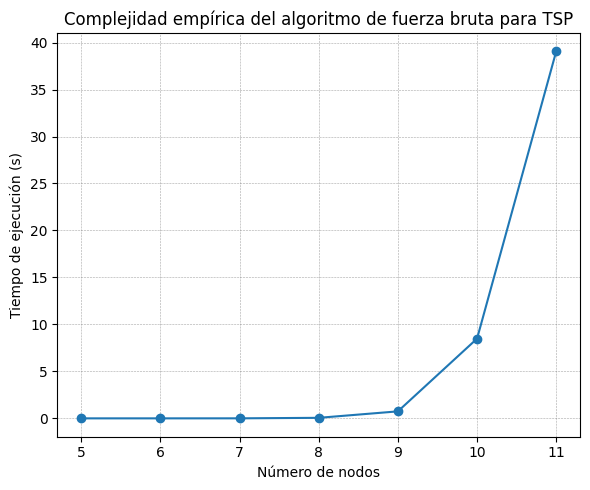

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(sizes, times, marker='o')
ax.set_xlabel('Número de nodos')
ax.set_ylabel('Tiempo de ejecución (s)')
ax.set_title('Complejidad empírica del algoritmo de fuerza bruta para TSP')


ax.grid(
    True,
    color='gray',
    linestyle='--',
    linewidth=0.4,
    alpha=0.7
)

fig.tight_layout()
plt.show()


In [96]:
sizes = []
times = []

for tsp in TSPs:
    nodes = tsp.x
    dist_matrix = tsp.distance_matrices[0]
    _, _, elapsed = classic_algorithms.held_karp(nodes, dist_matrix)
    sizes.append(len(nodes))
    times.append(elapsed)

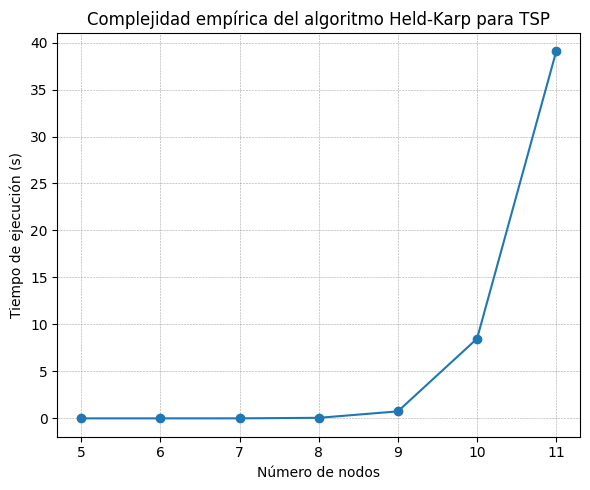

In [114]:
fig, ax = plt.subplots(figsize=(6, 5))

plt.plot(sizes, times, marker='o')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Complejidad empírica del algoritmo Held-Karp para TSP')
ax.grid(
    True,
    color='gray',
    linestyle='--',
    linewidth=0.4,
    alpha=0.7
)

fig.tight_layout()
plt.show()